In [5]:
# Cell 1: Data Loading and Preprocessing
import numpy as np
import pandas as pd

# Load the dataset (update the file path if needed)
df = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning\A1\AML_Ass01\AML_Ass01\linear_regression_dataset.csv")

print("Initial Data:")
print(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Handle missing values (for numerical columns, fill missing values with the median)
df.fillna(df.median(), inplace=True)
print("\nData after filling missing values:")
print(df.head())


Initial Data:
   House_Age  Num_Bedrooms  Area_Sqft  Distance_to_City_Center  House_Price
0       52.0           NaN        NaN                    11.70    775191.00
1       93.0           1.0     3885.0                    36.65    736213.94
2       15.0           4.0      521.0                    30.14     85602.28
3       72.0           3.0      909.0                     3.69    185856.91
4       61.0           2.0     1394.0                    43.92    222752.21

Missing Values per Column:
House_Age                  32
Num_Bedrooms               27
Area_Sqft                  35
Distance_to_City_Center    19
House_Price                32
dtype: int64

Data after filling missing values:
   House_Age  Num_Bedrooms  Area_Sqft  Distance_to_City_Center  House_Price
0       52.0           3.0     2781.0                    11.70    775191.00
1       93.0           1.0     3885.0                    36.65    736213.94
2       15.0           4.0      521.0                    30.14     85602.28

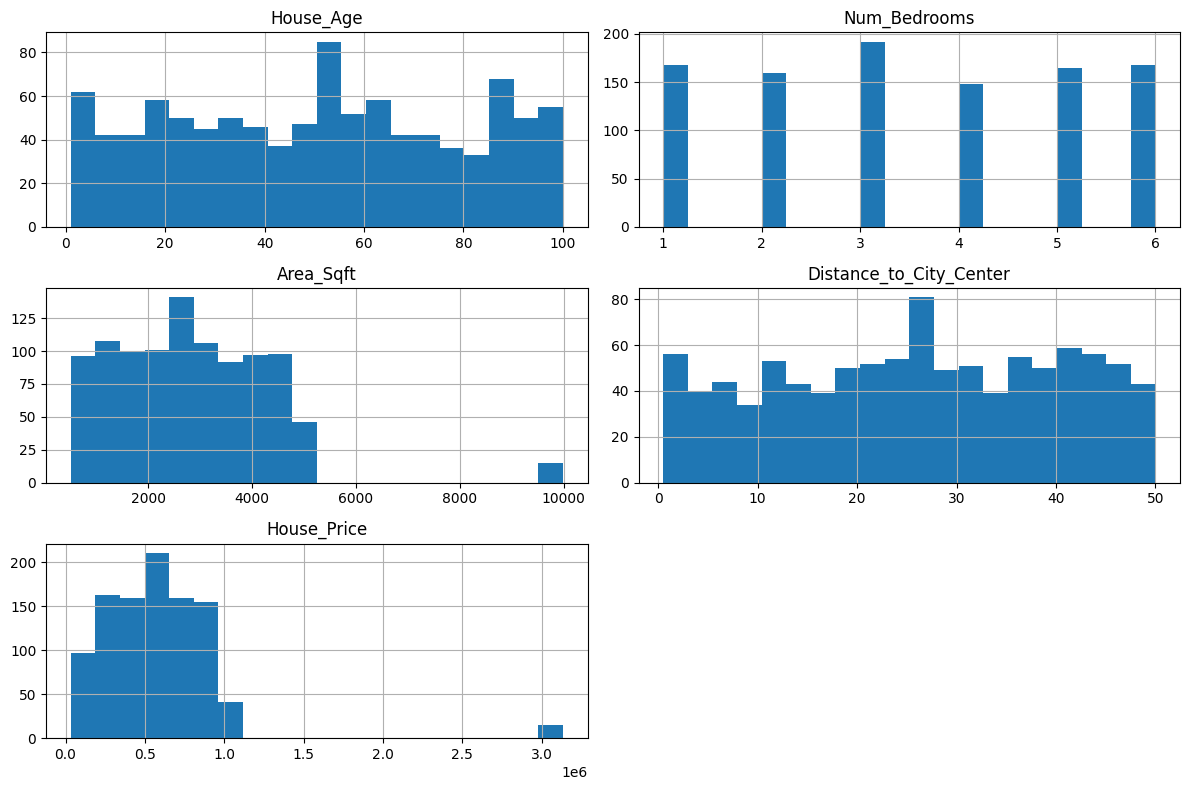

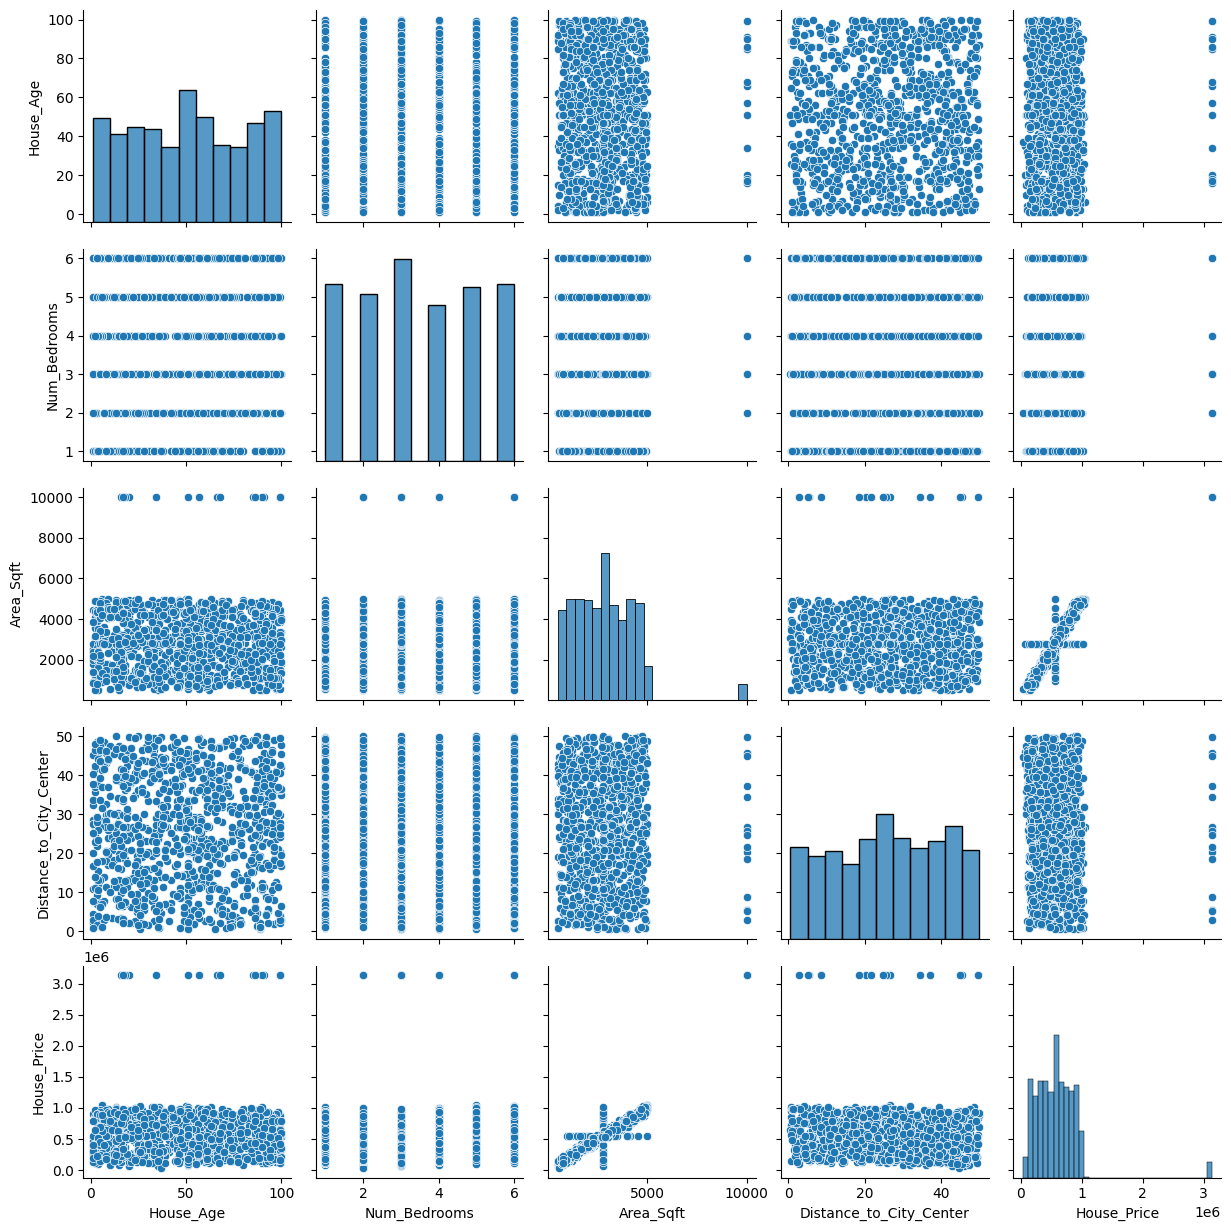

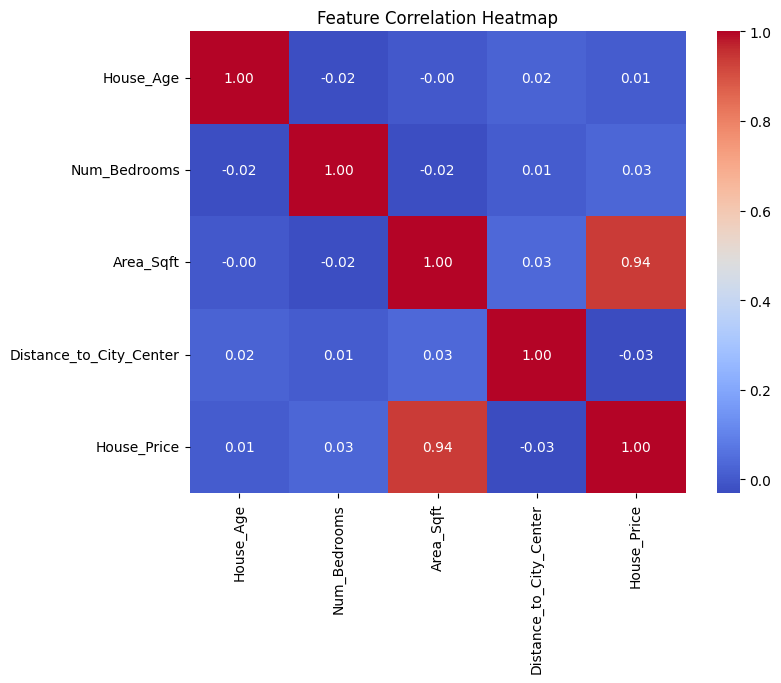

In [6]:
# Cell 2: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between features and House_Price
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


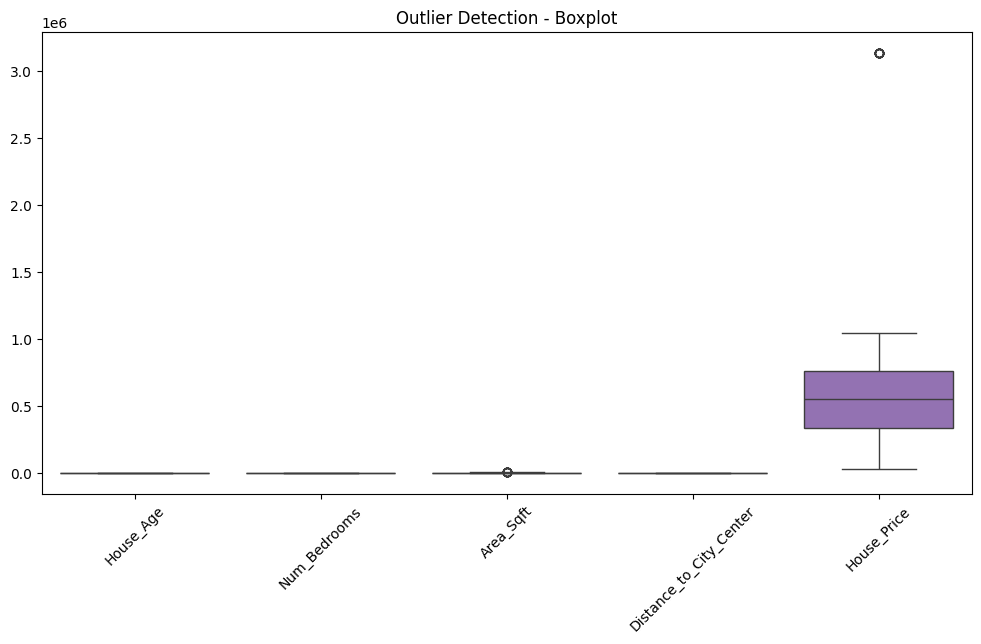

Shape before outlier removal: (1000, 5)
Shape after outlier removal: (985, 5)


In [7]:
# Cell 3: Outlier Detection and Removal
# Visualize outliers with boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Outlier Detection - Boxplot")
plt.show()

# Remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove rows where any column has a value outside the acceptable range
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


In [8]:
# Cell 4: Normalize/Scale Numerical Features
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = ['House_Age', 'Num_Bedrooms', 'Area_Sqft', 'Distance_to_City_Center']
target = 'House_Price'

X = df_clean[features]
y = df_clean[target]

# Scale the features (it's common to scale only X for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame for ease of use
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("First five rows of scaled features:")
print(X_scaled_df.head())


First five rows of scaled features:
   House_Age  Num_Bedrooms  Area_Sqft  Distance_to_City_Center
0   0.060805     -0.282615   0.041257                -1.018598
1   1.474510     -1.452259   0.917358                 0.758891
2  -1.214978      0.302208  -1.752212                 0.295106
3   0.750417     -0.282615  -1.444307                -1.589247
4   0.371130     -0.867437  -1.059425                 1.276821


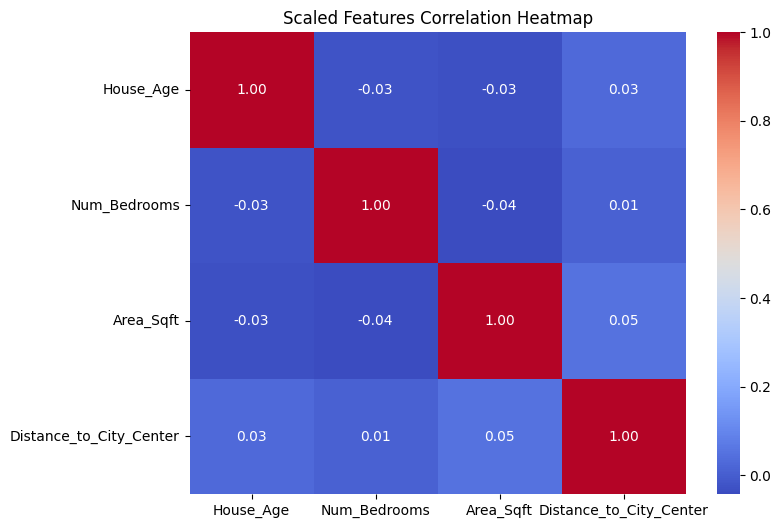

Shape of polynomial features: (985, 14)
Polynomial feature names:
['House_Age' 'Num_Bedrooms' 'Area_Sqft' 'Distance_to_City_Center'
 'House_Age^2' 'House_Age Num_Bedrooms' 'House_Age Area_Sqft'
 'House_Age Distance_to_City_Center' 'Num_Bedrooms^2'
 'Num_Bedrooms Area_Sqft' 'Num_Bedrooms Distance_to_City_Center'
 'Area_Sqft^2' 'Area_Sqft Distance_to_City_Center'
 'Distance_to_City_Center^2']


In [9]:
# Cell 5: Feature Correlation and Creating Polynomial Features
# Check correlation again on scaled features (the pattern remains the same)
plt.figure(figsize=(8, 6))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Scaled Features Correlation Heatmap")
plt.show()

# Create polynomial features to capture non-linearity (e.g., degree 2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print("Shape of polynomial features:", X_poly.shape)
# Optionally, get feature names:
poly_feature_names = poly.get_feature_names_out(features)
print("Polynomial feature names:")
print(poly_feature_names)


In [10]:
# Cell 6: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Here we can choose to use either the original scaled features or the polynomial features.
# For example, we'll use the polynomial features for training.
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (788, 14)
Testing set shape: (197, 14)


In [11]:
# Cell 7: Train and Evaluate Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Scikit-Learn Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Scikit-Learn Linear Regression Performance:
Mean Absolute Error (MAE): 33259.40492620839
Mean Squared Error (MSE): 5171440171.914506
R² Score: 0.9180413423967249


In [12]:
# Cell 8: Linear Regression using Gradient Descent from scratch
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Initialize weights (including bias as the first weight)
    n_samples, n_features = X.shape
    # Add bias term to X (column of ones)
    X_bias = np.hstack((np.ones((n_samples, 1)), X))
    weights = np.zeros(X_bias.shape[1])
    
    # Gradient descent loop
    for epoch in range(epochs):
        predictions = X_bias.dot(weights)
        errors = predictions - y
        # Compute gradient (MSE derivative)
        gradient = (1 / n_samples) * X_bias.T.dot(errors)
        weights = weights - learning_rate * gradient
    return weights

# Train the model using gradient descent
weights = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=2000)
print("Weights from Gradient Descent:", weights)

# Define a function to make predictions with the learned weights
def predict_gd(X, weights):
    n_samples = X.shape[0]
    X_bias = np.hstack((np.ones((n_samples, 1)), X))
    return X_bias.dot(weights)

# Predict on the test set using gradient descent model
y_pred_gd = predict_gd(X_test, weights)

# Evaluate Gradient Descent model
mae_gd = mean_absolute_error(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print("\nGradient Descent Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mae_gd)
print("Mean Squared Error (MSE):", mse_gd)
print("R² Score:", r2_gd)


Weights from Gradient Descent: [ 5.24255824e+05 -2.57043020e+02  1.75468062e+04  2.46030762e+05
 -2.12592579e+04  5.80116596e+02 -6.13704553e+02 -2.25900332e+03
  2.79368769e+03  7.82875655e+03  2.14798007e+03  7.81003576e+02
  4.20017864e+03 -1.17221834e+03  3.10578176e+03]

Gradient Descent Linear Regression Performance:
Mean Absolute Error (MAE): 34238.54930699822
Mean Squared Error (MSE): 5374637411.45285
R² Score: 0.9148210067788638


In [13]:
# Cell 9: Predict House Prices for New Data using the Scikit-Learn Model
def predict_house_price(new_data, scaler, poly, model):
    """
    new_data: dict with keys as features ['House_Age', 'Num_Bedrooms', 'Area_Sqft', 'Distance_to_City_Center']
    scaler: fitted StandardScaler for input features
    poly: fitted PolynomialFeatures transformer
    model: trained regression model
    """
    # Create DataFrame from new data
    new_df = pd.DataFrame([new_data])
    
    # Scale features
    new_scaled = scaler.transform(new_df[features])
    
    # Create polynomial features
    new_poly = poly.transform(new_scaled)
    
    # Predict using the provided model
    predicted_price = model.predict(new_poly)
    return predicted_price[0]

# Example new data point
new_house = {
    'House_Age': 10,
    'Num_Bedrooms': 3,
    'Area_Sqft': 1500,
    'Distance_to_City_Center': 5
}

predicted_price = predict_house_price(new_house, scaler, poly, lr_model)
print("Predicted House Price for new data:", predicted_price)


Predicted House Price for new data: 325763.0129211561


In [14]:
# Cell 10: Compare Predictions from Both Models on the New Data Point
# Prepare new data similarly for gradient descent model prediction
new_df = pd.DataFrame([new_house])
new_scaled = scaler.transform(new_df[features])
new_poly = poly.transform(new_scaled)

# Prediction using Gradient Descent model
y_new_pred_gd = predict_gd(new_poly, weights)
print("Predicted House Price using Gradient Descent:", y_new_pred_gd[0])


Predicted House Price using Gradient Descent: 325900.15891101514
